# Gaussian mixture model random sample generation <br>
Reference : <br>
https://datachemeng.com/post-3315/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv('glass.csv')
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df = df.drop(df.columns[[0,1,10]], axis=1)
print(df.shape)
df.head()

(214, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


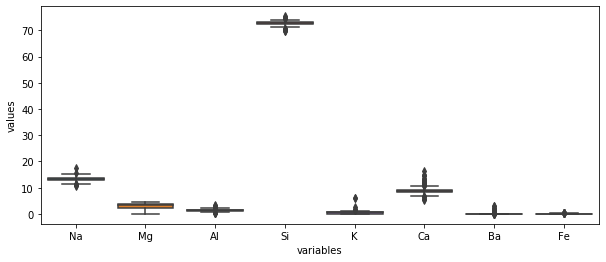

In [4]:
# See the distributions of variables

start = df.columns.get_loc('Na')          # column of 'cylinders'
end   = df.columns.get_loc('Fe') + 1     # column of 'acceleration'

fig = plt.figure(figsize=(10, 4))
sns.boxplot(data=df.iloc[:, start:end])
plt.xlabel('variables')
plt.ylabel('values')
plt.show()

In [5]:
# Remove outliers if necessary
df = df[df['K'] < 5.0]
df = df[df['Ca'] < 10.0]
print(df.shape)

(185, 8)


### Standardization

         Na        Mg        Al        Si         K        Ca        Ba  \
0  0.213670  1.227108 -0.751193 -1.386904 -1.181480  0.293303 -0.383948   
1  0.548095  0.509140 -0.197525  0.023187  0.034105 -1.048637 -0.383948   
2  0.066523  0.468805  0.185784  0.409107 -0.226377 -1.121568 -0.383948   
3 -0.361540  0.581744 -0.346589 -0.154930  0.294588 -0.479771 -0.383948   
4 -0.281278  0.525274 -0.453064  0.542695  0.236703 -0.698565 -0.383948   

         Fe  
0 -0.588376  
1 -0.588376  
2 -0.588376  
3 -0.588376  
4 -0.588376  


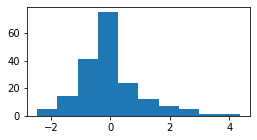

In [6]:
# standardize df
df_std = (df - df.mean(axis=0)) / df.std(axis=0)

print(df_std.head())
plt.figure(figsize=(4,2))
plt.hist(df_std.iloc[:, 2])   # see INDUS just for example
plt.show()

         Na        Mg        Al        Si         K        Ca       Ba  \
0  0.214250  1.230438 -0.753231 -1.390668 -1.184687  0.294099 -0.38499   
1  0.549583  0.510522 -0.198061  0.023250  0.034198 -1.051482 -0.38499   
2  0.066704  0.470077  0.186288  0.410217 -0.226992 -1.124612 -0.38499   
3 -0.362521  0.583322 -0.347530 -0.155350  0.295387 -0.481073 -0.38499   
4 -0.282042  0.526700 -0.454293  0.544167  0.237345 -0.700461 -0.38499   

         Fe  
0 -0.589973  
1 -0.589973  
2 -0.589973  
3 -0.589973  
4 -0.589973  


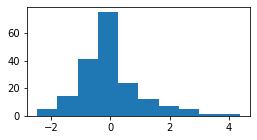

In [7]:
# Just another method
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
scaler.transform(df)
df_std2 = pd.DataFrame(scaler.transform(df), columns=df.columns)

print(df_std2.head())
plt.figure(figsize=(4,2))
plt.hist(df_std2.iloc[:, 2])
plt.show()

### Bayesian information criterion (BIC)

In [8]:
# Check BIC to choose the best covariavce type
max_number_of_components = 10
covariance_types = ['full', 'diag', 'tied', 'spherical']

In [9]:
bic_values = np.empty([max_number_of_components, len(covariance_types)])
bic_values.shape

(10, 4)

In [10]:
from sklearn.mixture import GaussianMixture

# Grid search using BIC
for covariance_type_index, covariance_type in enumerate(covariance_types):
    for number_of_components in range(max_number_of_components):
        gmm_model = GaussianMixture(n_components = number_of_components + 1, covariance_type = covariance_type)
        gmm_model.fit(df_std)
        bic_values[number_of_components, covariance_type_index] = gmm_model.bic(df_std)

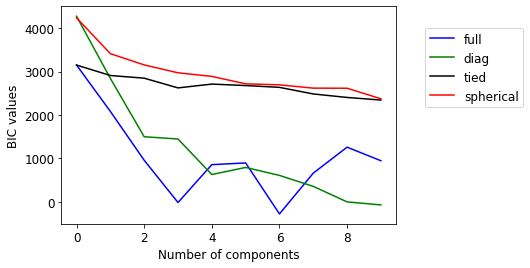

In [11]:
# Plot
plt.rcParams["font.size"] = 12
plt.figure()

plt.plot(bic_values[:, 0], 'b-', label='full')
plt.plot(bic_values[:, 1], 'g-', label='diag')
plt.plot(bic_values[:, 2], 'k-', label='tied')
plt.plot(bic_values[:, 3], 'r-', label='spherical')

plt.xlabel('Number of components')
plt.ylabel('BIC values')
plt.legend(bbox_to_anchor=(0.88, 0.9, 0.5, 0.001), borderaxespad=0., )
plt.show()

In [12]:
# Optimal parameters
optimal_index = np.where(bic_values == bic_values.min())
optimal_number_of_components = optimal_index[0][0] + 1
optimal_covariance_type = covariance_types[optimal_index[1][0]]

print(optimal_index)
print(optimal_number_of_components)
print(optimal_covariance_type)

(array([6], dtype=int64), array([0], dtype=int64))
7
full


In [13]:
# GMM
gmm = GaussianMixture(n_components = optimal_number_of_components, covariance_type = optimal_covariance_type)
gmm.fit(df_std)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=7, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [14]:
# Mean and covariance
means = gmm.means_

if gmm.covariance_type == 'full':
    all_covariances = gmm.covariances_
    
elif gmm.covariance_type == 'diag':
    all_covariances = np.empty(
        [gmm.n_components, gmm.covariances_.shape[1], gmm.covariances_.shape[1]])
    for component_number in range(gmm.n_components):
        all_covariances[component_number, :, :] = np.diag(gmm.covariances_[component_number, :])
        
elif gmm.covariance_type == 'tied':
    all_covariances = np.tile(gmm.covariances_, (gmm.n_components, 1, 1))
    
elif gmm.covariance_type == 'spherical':
    all_covariances = np.empty([gmm.n_components, gmm.means_.shape[1], gmm.means_.shape[1]])
    for component_number in range(gmm.n_components):
        all_covariances[component_number, :, :] = np.diag(
            gmm.covariances_[component_number] * np.ones(gmm.means_.shape[1]))

In [15]:
# Input the size of random variables
N = input('Input number of random variables for simulation : ')         # simulation sample size like 10000
number_of_samples_generated = int(N)

Input number of random variables for simulation : 1000


In [16]:
# Sample generation
all_samples_generated = np.zeros([0, df.shape[1]])

for component in range(gmm.n_components):
    generated_samples = np.random.multivariate_normal(means[component, :], all_covariances[component, :, :], \
                        int(np.ceil(number_of_samples_generated * gmm.weights_[component])))
    all_samples_generated = np.r_[all_samples_generated, generated_samples]

all_samples_generated = pd.DataFrame(all_samples_generated, columns=df.columns)

all_samples_generated = all_samples_generated * df.std(axis=0, ddof=1) + df.mean(axis=0)

In [17]:
all_samples_generated.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.305030,3.770487,1.444971,72.204592,0.489089,8.577837,-0.000456,-0.026346
1,12.569403,3.265512,1.733413,72.954857,0.855197,8.366643,0.000101,0.170970
2,13.802700,3.619052,1.629158,72.160240,0.528110,8.181646,-0.000472,-0.030460
3,12.858079,3.777345,1.066589,72.581679,0.466020,9.231045,0.000703,-0.027320
4,13.526633,3.421898,0.990745,72.244839,0.425042,9.305310,-0.000695,0.076130


In [18]:
# Save
all_samples_generated.to_csv('generated_samples_GMM.csv', index = None)

Samples generated for reverse analysis


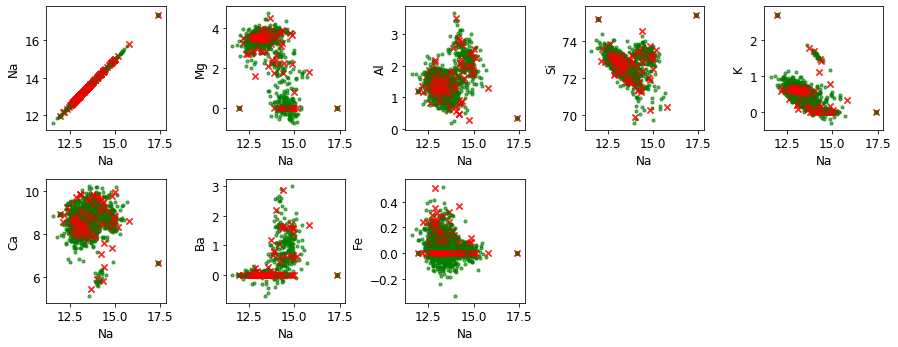

In [19]:
# Draw scatter plots of samples generated for reverse analysis
horz = 5                     # vertical number of graph
vert = 5                     # horizontal number of graph
graph_num = horz * vert      # maximum number of graphs
axes = list()

print('Samples generated for reverse analysis')
fig = plt.figure(figsize=(15, 15))

for i in range(0, end-start):
    axes.append(fig.add_subplot(vert, horz, i+1))

    for j in range(start, end) :
        x_sample = all_samples_generated.iloc[:, start]
        y_sample = all_samples_generated.iloc[:, i]
        x_train  = df.iloc[:, start]
        y_train  = df.iloc[:, i]
        axes[i].scatter(x_sample, y_sample, c='g', marker = '.', alpha = 0.1)
        axes[i].scatter(x_train, y_train, c='red', marker = 'x', alpha = 0.2)
        axes[i].set_xlabel(df.columns[start], size = 12)
        axes[i].set_ylabel(df.columns[i], size = 12)

plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.show()

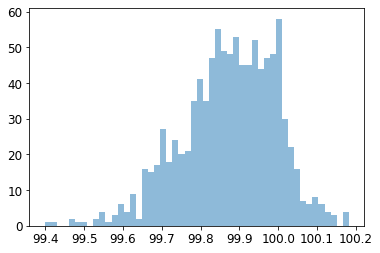

In [20]:
# Check the total amount of elements
ttl = all_samples_generated.sum(axis = 1)
plt.hist(ttl, 50, alpha = 0.5)
plt.show()

In [21]:
# Check values of generated samples ==> negative velues for elements are found
df_recall = pd.read_csv('generated_samples_GMM.csv')
print(df_recall.shape)
df_recall.head()

(1003, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.305030,3.770487,1.444971,72.204592,0.489089,8.577837,-0.000456,-0.026346
1,12.569403,3.265512,1.733413,72.954857,0.855197,8.366643,0.000101,0.170970
2,13.802700,3.619052,1.629158,72.160240,0.528110,8.181646,-0.000472,-0.030460
3,12.858079,3.777345,1.066589,72.581679,0.466020,9.231045,0.000703,-0.027320
4,13.526633,3.421898,0.990745,72.244839,0.425042,9.305310,-0.000695,0.076130


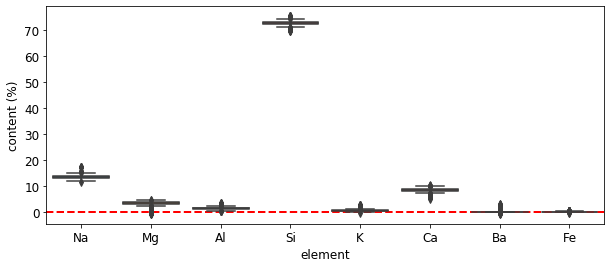

In [22]:
fig = plt.figure(figsize=(10, 4))
sns.boxplot(data=df_recall)
plt.hlines(y=0.0, xmin=-0.5, xmax=7.5, colors='r', linewidths=2, linestyles='dashed')
plt.xlabel('element')
plt.ylabel('content (%)')
plt.show()

In [23]:
# Remove negative values
df_recall = df_recall[df_recall > 0.0]
print(df_recall.shape)
df_recall.head()

(1003, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.305030,3.770487,1.444971,72.204592,0.489089,8.577837,NaN,NaN
1,12.569403,3.265512,1.733413,72.954857,0.855197,8.366643,0.000101,0.17097
2,13.802700,3.619052,1.629158,72.160240,0.528110,8.181646,NaN,NaN
3,12.858079,3.777345,1.066589,72.581679,0.466020,9.231045,0.000703,NaN
4,13.526633,3.421898,0.990745,72.244839,0.425042,9.305310,NaN,0.07613


In [24]:
# Negative values are small so let's use zero instead
df_recall.fillna(0, inplace=True)
print(df_recall.shape)
df_recall.head()

(1003, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.305030,3.770487,1.444971,72.204592,0.489089,8.577837,0.000000,0.00000
1,12.569403,3.265512,1.733413,72.954857,0.855197,8.366643,0.000101,0.17097
2,13.802700,3.619052,1.629158,72.160240,0.528110,8.181646,0.000000,0.00000
3,12.858079,3.777345,1.066589,72.581679,0.466020,9.231045,0.000703,0.00000
4,13.526633,3.421898,0.990745,72.244839,0.425042,9.305310,0.000000,0.07613


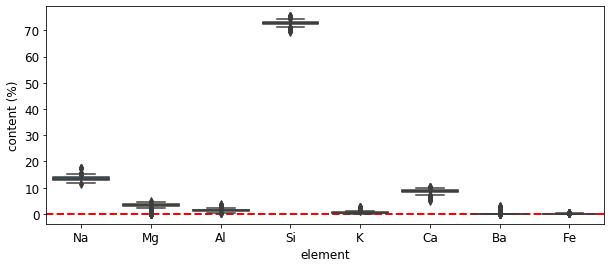

In [25]:
# See the distrubution
fig = plt.figure(figsize=(10, 4))
sns.boxplot(data=df_recall)
plt.hlines(y=0.0, xmin=-0.5, xmax=7.5, colors='r', linewidths=2, linestyles='dashed')
plt.xlabel('element')
plt.ylabel('content (%)')
plt.show()

In [26]:
# Adjust total amount of elements is 100%
df_adj = df_recall.apply(lambda x: 100 * x / np.sum(x), axis=1)
df_adj.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.332761,3.778346,1.447983,72.355085,0.490109,8.595716,0.000000,0.000000
1,12.579958,3.268255,1.734868,73.016120,0.855916,8.373669,0.000101,0.171114
2,13.813626,3.621917,1.630448,72.217359,0.528528,8.188122,0.000000,0.000000
3,12.860463,3.778046,1.066787,72.595138,0.466106,9.232757,0.000703,0.000000
4,13.527905,3.422220,0.990838,72.251634,0.425082,9.306185,0.000000,0.076137


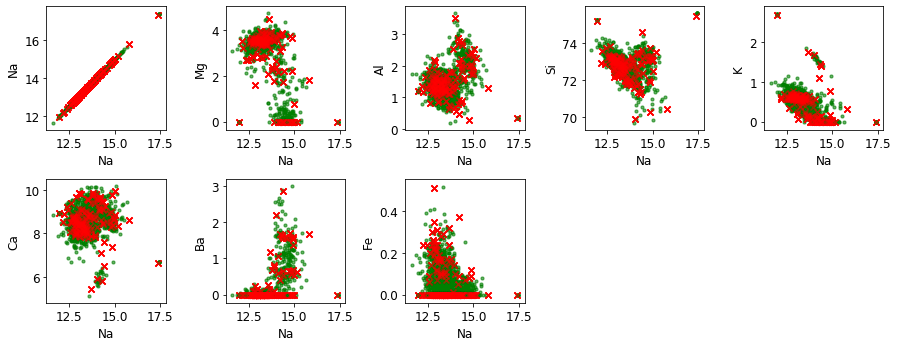

In [27]:
# Draw scatter plots of samples generated for reverse analysis
horz = 5                     # vertical number of graph
vert = 5                     # horizontal number of graph
graph_num = horz * vert      # maximum number of graphs
axes = list()

#print('Samples generated for reverse analysis')
fig = plt.figure(figsize=(15, 15))

for i in range(0, end-start):
    axes.append(fig.add_subplot(vert, horz, i+1))

    for j in range(start, end) :
        x_sample = df_adj.iloc[:, start]
        y_sample = df_adj.iloc[:, i]
        x_train  = df.iloc[:, start]
        y_train  = df.iloc[:, i]
        axes[i].scatter(x_sample, y_sample, c='g', marker = '.', alpha = 0.1)
        axes[i].scatter(x_train, y_train, c='red', marker = 'x', alpha = 0.5)
        axes[i].set_xlabel(df.columns[start], size = 12)
        axes[i].set_ylabel(df.columns[i], size = 12)

plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.show()

In [28]:
# Sanity check adjustment result
test = np.sum(df_adj, axis=1)
print(test[0:2])
print(test[998:1000])

0    100.0
1    100.0
dtype: float64
998    100.0
999    100.0
dtype: float64


In [29]:
df_adj.to_csv('generated_samples_GMM_adj.csv', index = None)